In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def Recta(x):
  return 3*x + 2

In [79]:
p = np.array([5.,4.])

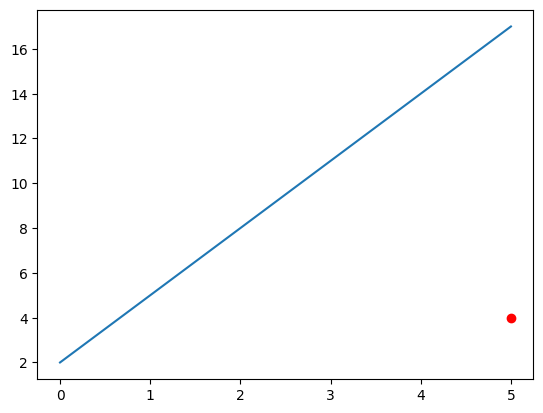

In [80]:
x = np.linspace(0,5,10)
plt.plot(x,Recta(x))
plt.scatter(p[0],p[1],color='r')

In [81]:
def GetDistance(x):
  return np.sqrt( (x-p[0])**2 + (Recta(x)-p[1])**2)

In [82]:
GetDistance(1)

np.float64(4.123105625617661)

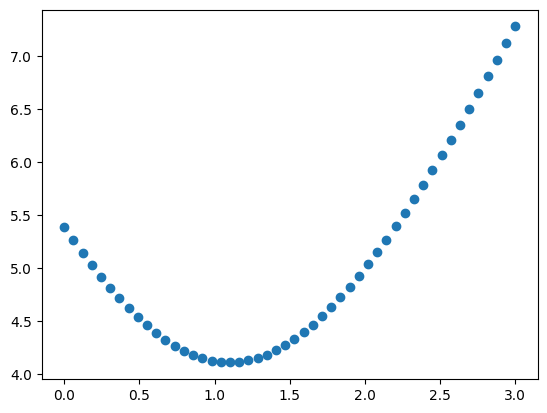

In [83]:
x = np.linspace(0,3,50)
d = GetDistance(x)
plt.scatter(x,d)

In [132]:
def Derivative(f,x,h=1e-3):
  return (f(x+h)-f(x-h))/(2*h)

def Derivative2(f,x,h=1e-3):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

In [133]:
DR = Derivative(GetDistance,x)
DR2 = Derivative2(GetDistance,x)

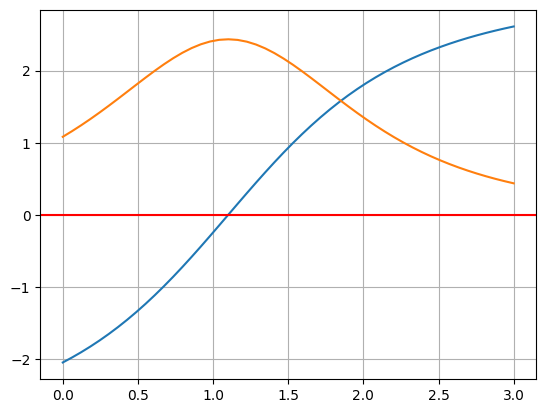

In [134]:
plt.plot(x,DR)
plt.plot(x,DR2)
plt.axhline(y=0,color='r')
plt.grid()

In [135]:
# Usando el teorema de boltzano
minimo = 0
for i in range(len(x)-1):
  fi = Derivative(GetDistance,x[i])
  fj = Derivative(GetDistance,x[i+1])
  if fi*fj < 0:
    print(x[i],GetDistance,x[i+1])
    minimo = x[i]
    break

1.0408163265306123 <function GetDistance at 0x7b75a419c220> 1.1020408163265305


In [136]:
# Error asociado a la discretizacion
x[1]-x[0]

np.float64(0.061224489795918366)

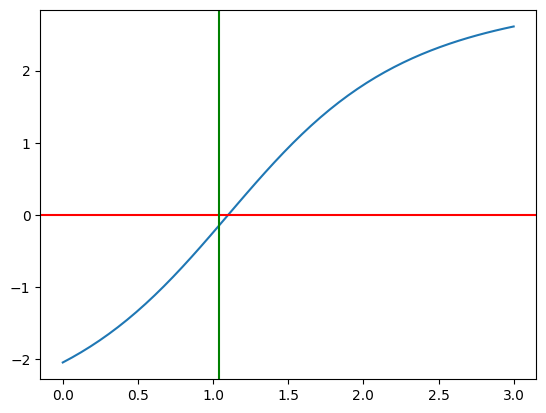

In [137]:
plt.plot(x,DR)
plt.axhline(y=0,color='r')
plt.axvline(x=minimo,color='g')

In [138]:
# Vamos a implementar un metodo numerico, por que la intuición es poco precisa

In [172]:
def GetNewtonMethod(f,xn,itmax=100,precision=1e-17):

  error = 1.
  it = 0

  while error > precision and it < itmax:

    try:
      xn1 = xn - Derivative(f,xn)/Derivative2(f,xn)
      #print(xn1,xn,Derivative(f,xn),Derivative2(f,xn))
      error = np.abs(xn1-xn)

    except ZeroDivisionError:
      print('Division por cero')
      return False

    xn = xn1
    it += 1

  if it == itmax:
    return False
  else:
    print(it,xn)
    return xn

In [186]:
root = GetNewtonMethod(GetDistance,2)

6 1.1000000000000294


In [187]:
root

np.float64(1.1000000000000294)

In [188]:
GetDistance(root)

np.float64(4.110960958218893)

In [189]:
# distancia exacta:
13/np.sqrt(10)

np.float64(4.110960958218893)